In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import norm
from scipy import signal
from matplotlib import gridspec
import matplotlib 
from open_ephys.analysis import Session

Text(0, 0.5, 'Number of trials')

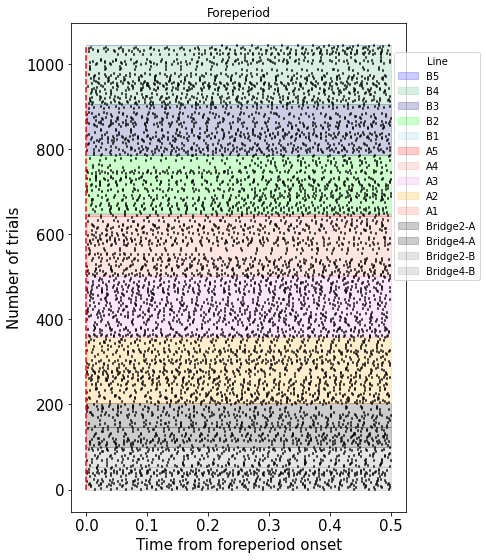

In [62]:
## foreperiod
fp = beh.ForePeriodEntry.to_numpy()/1000+beh['GlobalStart'].iloc[0]
currLoc=beh.CurrentState.to_numpy()
spikes_sortedbystate=[[] for x in range(len(np.unique(currLoc)))]
colors=['gray','gray','k','k','tomato','orange','violet','salmon','red','skyblue','lime','navy','mediumseagreen','blue']

for trial in range(len(beh)): 
    ind = (Spikes_alinged>fp[trial]) & (Spikes_alinged<(fp[trial]+0.5))
    trial_spike=Spikes_alinged[ind]-fp[trial]
    index=np.where(currLoc[trial]==np.unique(currLoc))[0][0]
    spikes_sortedbystate[index].append(trial_spike)
    
total_trial=0
stateNames=['Bridge4-B','Bridge2-B','Bridge4-A','Bridge2-A','A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']
plt.close('all')
fig,ax=plt.subplots(figsize=(6,9))

for curr in range(len(np.unique(currLoc))):
    
    curr_spikes = spikes_sortedbystate[curr]
    n_trial = len(curr_spikes)
    
    for tt in range(n_trial):
        if len(curr_spikes[tt])>0:
            plt.plot([curr_spikes[tt],curr_spikes[tt]],[tt+total_trial,tt+total_trial+1],'k-')
        
    plt.fill_between([0,0.5],[total_trial,total_trial],[total_trial+n_trial,total_trial+n_trial],
                     alpha=0.2,label=stateNames[curr],color=colors[curr])
    total_trial=total_trial+n_trial

plt.plot([0,0],[0,len(beh)],'r--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Line', bbox_to_anchor=(0.95, 0.95))
plt.title('Foreperiod')
plt.xlabel('Time from foreperiod onset')
plt.ylabel('Number of trials')
# plt.savefig('ForePeriod')

In [2]:
filepath='C:/Users/liang/Documents/Thesis/LinearGraph/D/DataCollection/LinearBridge_2023_05_08__13_53_51.beh.txt'
beh = pd.read_csv(filepath, sep=",")
beh.reset_index(drop=True, inplace=True)

In [8]:
a=beh.DelayperiodExit.values-beh.DelayperiodEntry.values

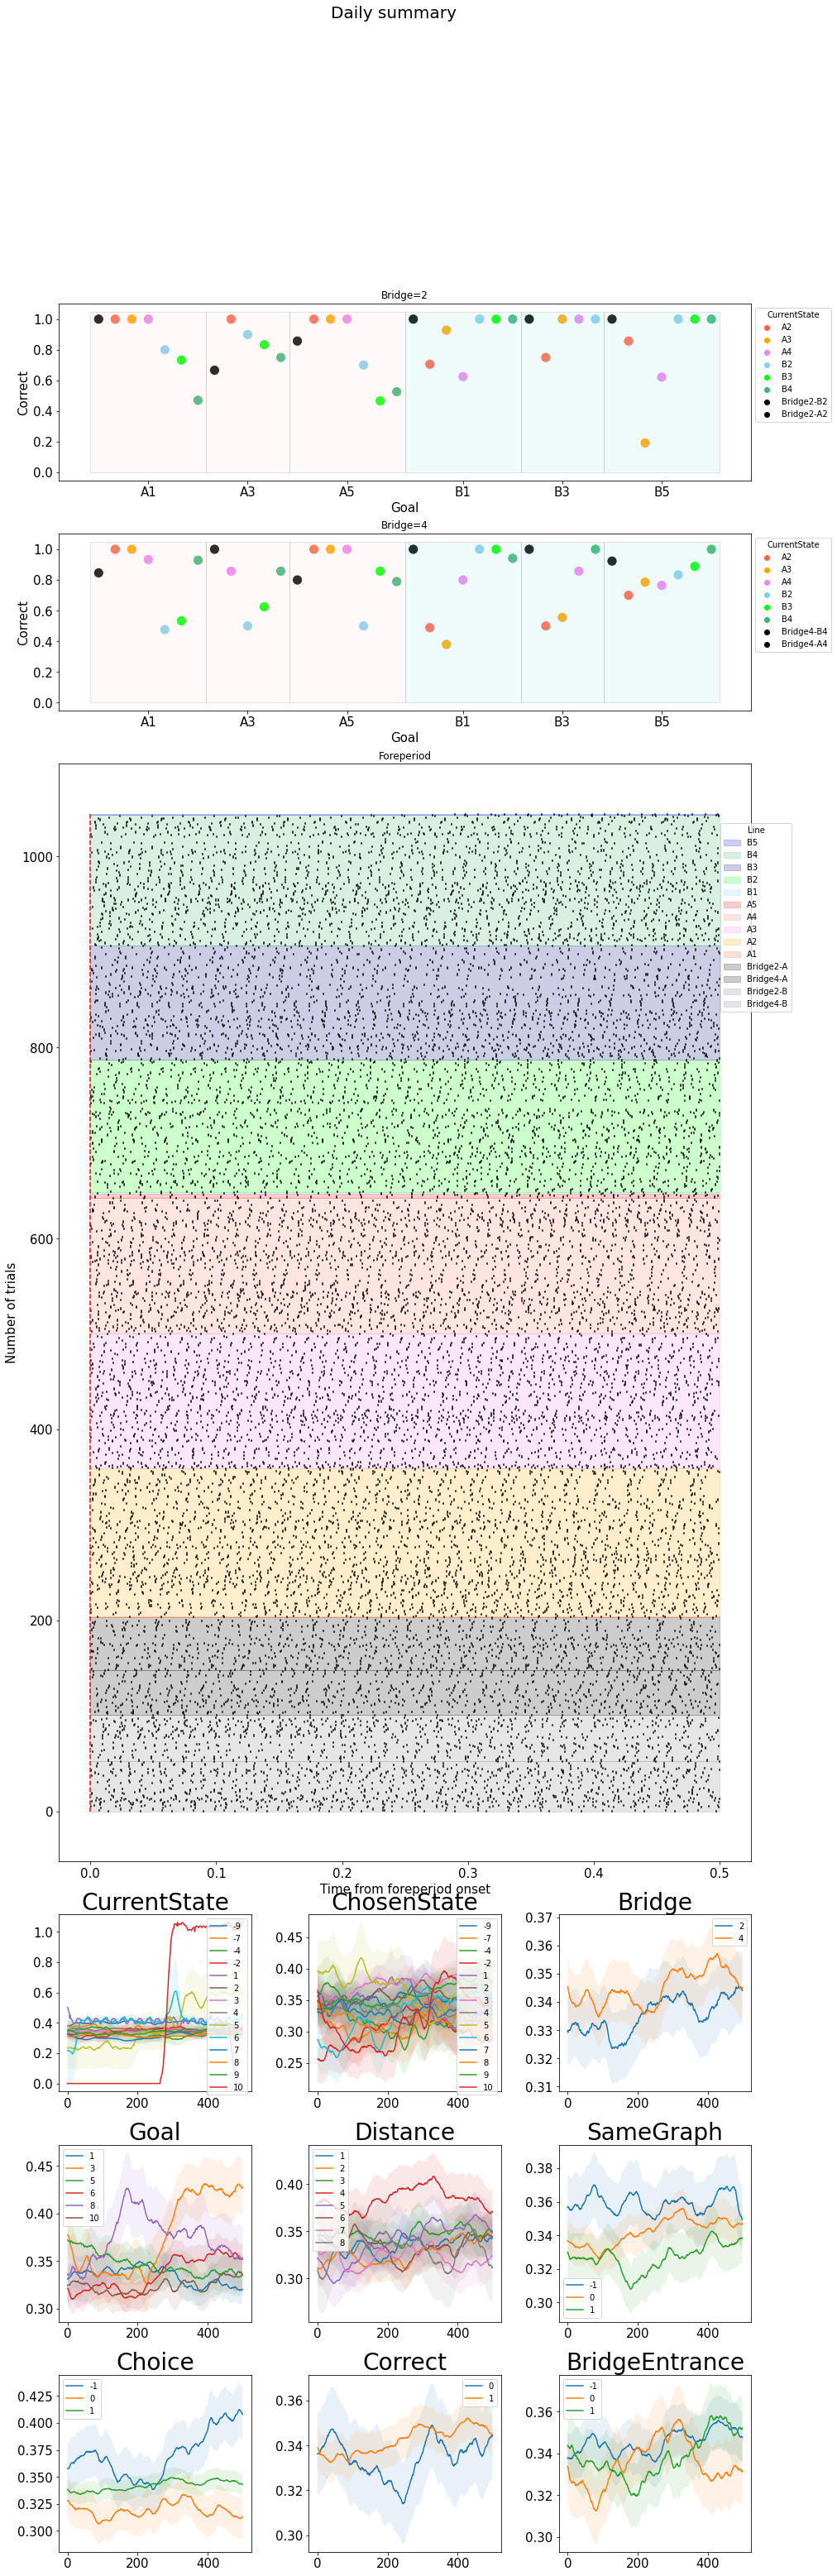

In [66]:
# import behavior
filepath='C:/Users/liang/Documents/Thesis/LinearGraph/D/DataCollection/LinearBridge_2023_05_08__13_53_51.beh.txt'
beh = pd.read_csv(filepath, sep=",")
beh.reset_index(drop=True, inplace=True)
# beh['Correct']=(np.diff(np.concatenate((beh.Distance.values,[8])))==-1) | (beh.ChosenState.values==beh.Goal.values)
stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']
nondeadend=beh[((beh.CurrentState.values%5>1) & (beh.CurrentState.values>0)) | (beh.BridgeState==1)]
bridge2=nondeadend[nondeadend.Bridge==2].groupby(['Goal','CurrentState']).mean().reset_index()[['Goal','CurrentState','Correct']].reset_index()
bridge4=nondeadend[nondeadend.Bridge==4].groupby(['Goal','CurrentState']).mean().reset_index()[['Goal','CurrentState','Correct']].reset_index()

mksize=150
s0=12
s1=15
s2=20
plt.close('all')

fig=plt.figure(figsize=(15,50),facecolor=(1, 1, 1))
plt.rc('axes', labelsize=s1)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=s1)    # fontsize of the tick labels
plt.rc('legend', fontsize=s0)    # legend fontsize
plt.rc('figure', titlesize=s2)  # fontsize of the figure title
plt.rc('legend',fontsize=10)
gs = gridspec.GridSpec(10, 3, wspace=0.3,hspace=0.3) 


ax1 = plt.subplot(gs[0,:])
sns.scatterplot(data=bridge2[(bridge2.CurrentState<5.5)&(bridge2.CurrentState>0)],x='index',y='Correct',
                hue='CurrentState',palette=['tomato','orange','violet'],ax=ax1,s=mksize)
sns.scatterplot(data=bridge2[bridge2.CurrentState>5.5],x='index',y='Correct',hue='CurrentState',
                palette=['skyblue','lime','mediumseagreen'],ax=ax1,s=mksize)
sns.scatterplot(data=bridge2[bridge2.CurrentState<0],x='index',y='Correct',hue='CurrentState',
                palette=['k','k'],ax=ax1,s=mksize)

sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
new_labels = ['A2','A3','A4','B2','B3','B4','Bridge2-B2','Bridge2-A2']
for t, l in zip(ax1.legend_.texts, new_labels):
    t.set_text(l)
    
xticks=np.zeros(6)
for ii,goal in enumerate(bridge2.Goal.unique()):
    if goal<5.5:
        goal_color='mistyrose'
    else:
        goal_color='paleturquoise'
    index = bridge2[bridge2.Goal==goal]['index'].values
    ax1.fill_between([index[0]-0.5,index[-1]+0.5],[0,0],[1.05,1.05],color=goal_color,edgecolor=[0.5,0.5,0.5],alpha=0.2)
    xticks[ii]=index.mean()

ax1.set_xticks(xticks)
ax1.set_xticklabels(['A1','A3','A5','B1','B3','B5'])
ax1.set_xlabel('Goal')
ax1.set_title('Bridge=2')


ax2 = plt.subplot(gs[1,:])
sns.scatterplot(data=bridge4[(bridge4.CurrentState<5.5)&(bridge4.CurrentState>0)],x='index',y='Correct',
                hue='CurrentState',palette=['tomato','orange','violet'],ax=ax2,s=mksize)
sns.scatterplot(data=bridge4[bridge4.CurrentState>5.5],x='index',y='Correct',hue='CurrentState',
                palette=['skyblue','lime','mediumseagreen'],ax=ax2,s=mksize)
sns.scatterplot(data=bridge4[bridge4.CurrentState<0],x='index',y='Correct',hue='CurrentState',
                palette=['k','k'],ax=ax2,s=mksize)

sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
new_labels = ['A2','A3','A4','B2','B3','B4','Bridge4-B4','Bridge4-A4']
for t, l in zip(ax2.legend_.texts, new_labels):
    t.set_text(l)
    
xticks=np.zeros(6)
for ii,goal in enumerate(bridge2.Goal.unique()):
    if goal<5.5:
        goal_color='mistyrose'
    else:
        goal_color='paleturquoise'
    index = bridge2[bridge2.Goal==goal]['index'].values
    ax2.fill_between([index[0]-0.5,index[-1]+0.5],[0,0],[1.05,1.05],color=goal_color,edgecolor=[0.5,0.5,0.5],alpha=0.2)
    xticks[ii]=index.mean()

ax2.set_xticks(xticks)
ax2.set_xticklabels(['A1','A3','A5','B1','B3','B5'])
ax2.set_xlabel('Goal')
ax2.set_title('Bridge=4')


## foreperiod
fp = beh.ForePeriodEntry.to_numpy()/1000+beh['GlobalStart'].iloc[0]
currLoc=beh.CurrentState.to_numpy()
spikes_sortedbystate=[[] for x in range(len(np.unique(currLoc)))]
colors=['gray','gray','k','k','tomato','orange','violet','salmon','red','skyblue','lime','navy','mediumseagreen','blue']

for trial in range(len(beh)): 
    ind = (Spikes_alinged>fp[trial]) & (Spikes_alinged<(fp[trial]+0.5))
    trial_spike=Spikes_alinged[ind]-fp[trial]
    index=np.where(currLoc[trial]==np.unique(currLoc))[0][0]
    spikes_sortedbystate[index].append(trial_spike)
    
total_trial=0
stateNames=['Bridge4-B','Bridge2-B','Bridge4-A','Bridge2-A','A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']

ax3 = plt.subplot(gs[2:7,:])
for curr in range(len(np.unique(currLoc))):
    
    curr_spikes = spikes_sortedbystate[curr]
    n_trial = len(curr_spikes)
    
    for tt in range(n_trial):
        if len(curr_spikes[tt])>0:
            plt.plot([curr_spikes[tt],curr_spikes[tt]],[tt+total_trial,tt+total_trial+1],'k-')
        
    plt.fill_between([0,0.5],[total_trial,total_trial],[total_trial+n_trial,total_trial+n_trial],
                     alpha=0.2,label=stateNames[curr],color=colors[curr])
    total_trial=total_trial+n_trial

plt.plot([0,0],[0,len(beh)],'r--')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1], title='Line', bbox_to_anchor=(0.95, 0.95))
ax3.set_title('Foreperiod')
ax3.set_xlabel('Time from foreperiod onset')
ax3.set_ylabel('Number of trials')
# plt.savefig('ForePeriod')



varOI = ['CurrentState','ChosenState','Bridge','Goal','Distance','SameGraph','Choice','Correct','BridgeEntrance']

for vv in range(9):
    
    ax = plt.subplot(gs[21+vv])

    variable=varOI[vv]
    conditioned_sdf_mean = neural.groupby([variable]).mean().iloc[:,-500::].values
    conditioned_sdf_sem = neural.groupby([variable]).sem().iloc[:,-500::].values
#     conditions=[str(x) for x in conditioned_sdf.index.values]
    conditions=neural.groupby([variable]).mean().index.values
    plt.plot(np.transpose(conditioned_sdf_mean))
    for ii in range(len(conditions)):
        plt.fill_between(np.arange(500),conditioned_sdf_mean[ii,:]-conditioned_sdf_sem[ii,:],
                         conditioned_sdf_mean[ii,:]+conditioned_sdf_sem[ii,:],alpha=0.1)
    plt.legend(conditions)
    ax.set_title(variable,fontsize=28)
    

plt.suptitle('Daily summary')
plt.savefig('Daily summary')

In [7]:
directory = 'C:/Users/liang/Downloads/recording1/continuous/Neuropix-PXI-100.ProbeA-AP/'
session = Session(directory)
# recording = session.recordnodes[0].recordings[3]
# samplesize=recording.continuous[0].samples.shape[0]
# chunksize=30000*60  ## one minute
# bins = int(np.floor(samplesize/chunksize))

OSError: No available data format detected.

In [201]:
Allspikes=[]

for bb in range(bins):
    
    voltage = recording.continuous[0].get_samples(start_sample_index=chunksize*bb, end_sample_index=chunksize*(bb+1))
    ts = recording.continuous[0].timestamps[chunksize*bb:chunksize*(bb+1)]
    x=-voltage[:,16]
    spikes, _ = find_peaks(x, height=1000)
    Allspikes=np.append(Allspikes,ts[spikes])
    
Spikes_alinged=Allspikes*1.000004904929-349.305599929718

In [7]:
Spikes_alinged=np.load('Spikes.npy')

In [9]:
filepath='C:/Users/liang/Documents/Thesis/LinearGraph/D/DataCollection/LinearBridge_2023_05_08__13_53_51.beh.txt'
beh = pd.read_csv(filepath, sep=",")
beh.reset_index(drop=True, inplace=True)
stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']

In [11]:
beh

,BridgeBlockNum,GoalBlockNum,TotalGoalBlockNum,EpisodeNum,TotalEpisodeNum,TrialNum,TotalTrialNum,Bridge,Goal,Start,...,TrialComplete,ChosenState,Correct,TrialEnd,GoalPeriodEntry,ForePeriodEntry,DelayperiodEntry,DelayperiodExit,FeedbackPeriodEntry,GlobalStart
0,1,1,1,1,1,1,1,4,10,2,...,0,3,1,0,0,4845,5595,6178,6911,124.278393
1,1,1,1,1,1,2,2,4,10,2,...,0,4,1,0,0,8111,8644,9444,10044,124.278393
2,1,1,1,1,1,3,3,4,10,2,...,0,-4,1,0,0,11243,11776,12409,13059,124.278393
3,1,1,1,1,1,6,6,4,10,2,...,0,4,0,0,0,21090,21790,22456,23206,124.278393
4,1,1,1,1,1,7,7,4,10,2,...,0,5,0,0,0,24405,24939,25572,26371,124.278393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,5,2,18,7,161,10,1160,4,1,7,...,0,1,1,0,7249216,7280272,7280805,7281572,7282205,124.278393
1041,5,2,18,8,162,1,1161,4,1,3,...,0,2,1,0,7284504,7286204,7286903,7287470,7288303,124.278393
1042,5,2,18,8,162,2,1162,4,1,3,...,0,1,1,0,7284504,7289503,7290102,7290802,7291535,124.278393
1043,5,2,18,9,163,1,1163,4,1,8,...,0,7,0,0,7293835,7295534,7296200,7296900,7297700,124.278393


In [12]:
spiketimes=[[] for trial in range(len(beh))]
sdf=np.zeros((len(beh),500))
gkernel = norm.pdf(np.linspace(norm.ppf(0.01),norm.ppf(0.99), 50))

for trial in range(len(beh)): 
    ref = beh['ForePeriodEntry'].iloc[trial]/1000+beh['GlobalStart'].iloc[0]
    ind = np.all((Spikes_alinged>ref-0.05,Spikes_alinged<(ref+0.55)),axis=0)
    trial_spike = Spikes_alinged[ind]-ref
    spiketimes[trial]=trial_spike
    binned_spike,_ = np.histogram(trial_spike,bins=np.arange(-0.05,0.550,0.001))
    sdf[trial,:] = signal.convolve(binned_spike, gkernel,mode='same')[50:-50]
    
neural=beh.copy()
neural['SpikeTimes']=spiketimes
neural = pd.concat([neural, pd.DataFrame(sdf)], axis=1)

In [13]:
binned_spike=binned_spike.melt(id_vars=beh.columns.values,var_name='Time', value_name='FR')

AttributeError: 'numpy.ndarray' object has no attribute 'melt'

Text(0.5, 0.98, 'SDF 50ms gaussian kernel')

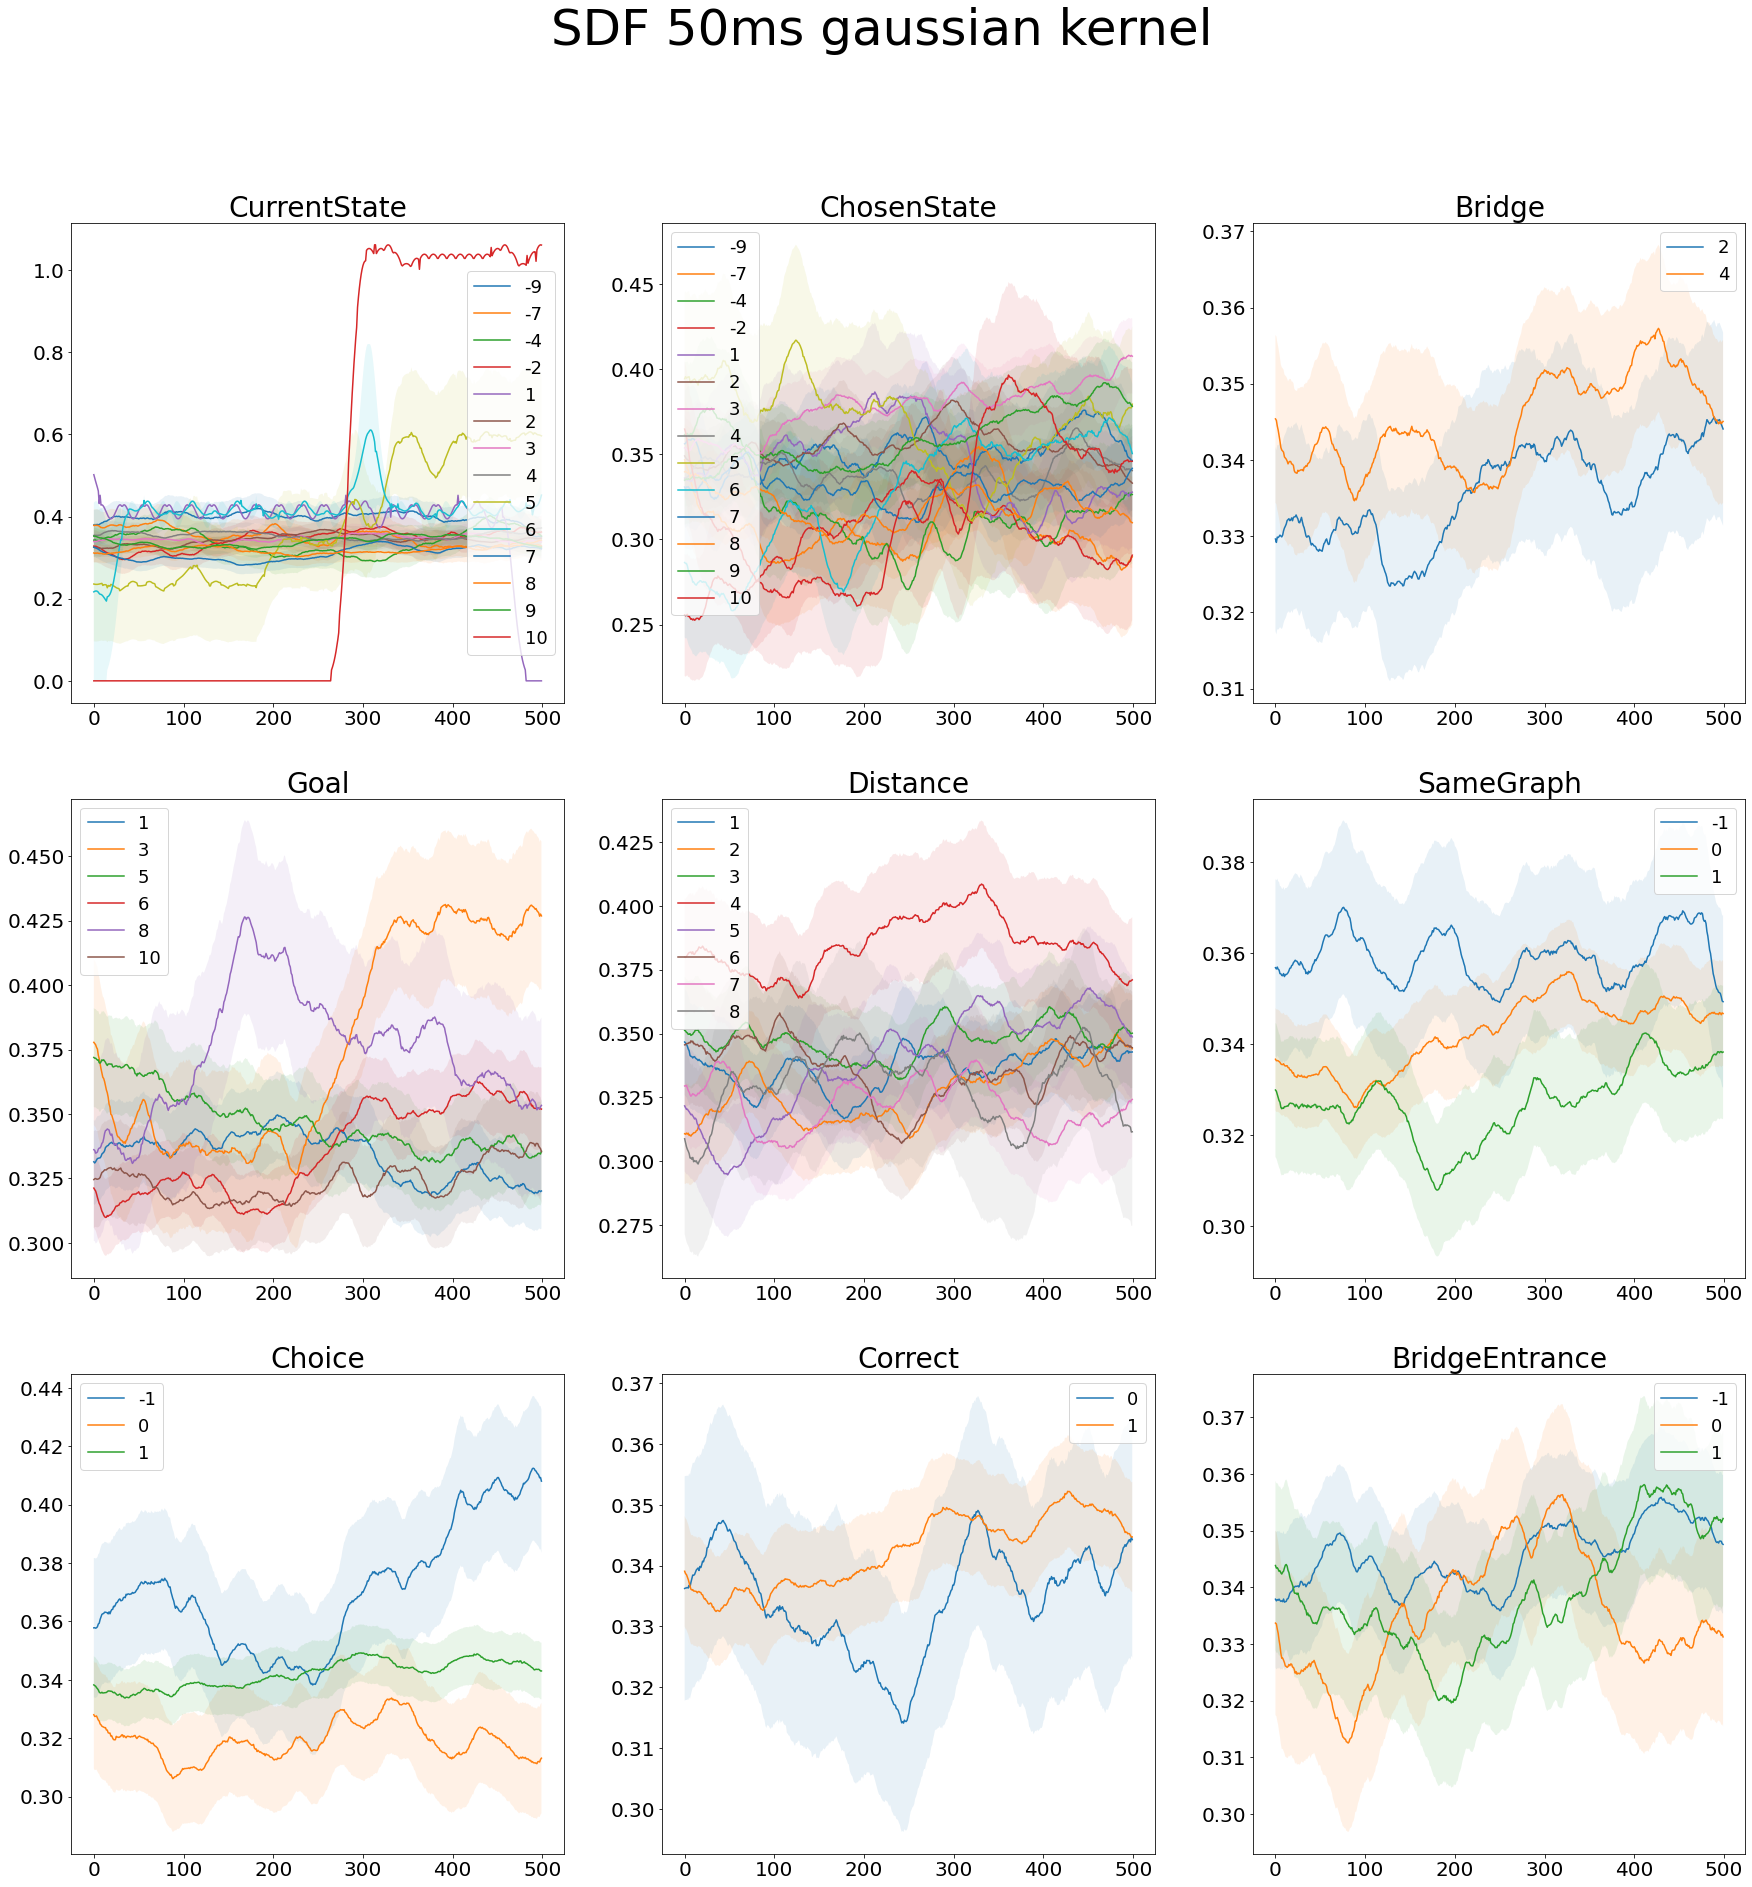

In [19]:
fig=plt.figure(figsize=(30,30),facecolor=(1, 1, 1))
gs = gridspec.GridSpec(3, 3,wspace=0.2,hspace=0.2) 
varOI = ['CurrentState','ChosenState','Bridge','Goal','Distance','SameGraph','Choice','Correct','BridgeEntrance']

for vv in range(9):
    
    ax = plt.subplot(gs[vv])

    variable=varOI[vv]
    conditioned_sdf_mean = neural.groupby([variable]).mean().iloc[:,-500::].values
    conditioned_sdf_sem = neural.groupby([variable]).sem().iloc[:,-500::].values
#     conditions=[str(x) for x in conditioned_sdf.index.values]
    conditions=neural.groupby([variable]).mean().index.values
    plt.plot(np.transpose(conditioned_sdf_mean))
    for ii in range(len(conditions)):
        plt.fill_between(np.arange(500),conditioned_sdf_mean[ii,:]-conditioned_sdf_sem[ii,:],
                         conditioned_sdf_mean[ii,:]+conditioned_sdf_sem[ii,:],alpha=0.1)
    plt.legend(conditions)
    plt.title(variable,fontsize=28)
    
s0=18
s1=20
s2=50
plt.rc('axes', labelsize=s1)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=s1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=s1)    # fontsize of the tick labels
plt.rc('legend', fontsize=s0)    # legend fontsize
plt.rc('figure', titlesize=s2)  # fontsize of the figure title
plt.suptitle('SDF 50ms gaussian kernel')

In [26]:
# import behavior
filepath='C:/Users/liang/Documents/Thesis/LinearGraph/D/Raw/LinearBridgeFinal_2023_04_28__13_30_17/LinearBridgeFinal_2023_04_28__13_30_17.beh.txt'
beh = pd.read_csv(filepath, sep=",")
beh = beh[beh['FeedbackPeriod']!=0]
beh.reset_index(drop=True, inplace=True)
stateNames=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5']

triallength=pd.DataFrame(beh.groupby(['TotalEpisodeNum']).count().TotalTrialNum)
triallength['TrialType']=beh['Distance'].iloc[np.append(0,np.array(np.where((np.diff(beh.TotalEpisodeNum.values)!=0)==True))+1)].values
triallength['Start']=beh['Start'].iloc[np.append(0,np.array(np.where((np.diff(beh.TotalEpisodeNum.values)!=0)==True))+1)].values
triallength['Goal']=beh['Goal'].iloc[np.append(0,np.array(np.where((np.diff(beh.TotalEpisodeNum.values)!=0)==True))+1)].values
triallength['Bridge']=beh['Bridge'].iloc[np.append(0,np.array(np.where((np.diff(beh.TotalEpisodeNum.values)!=0)==True))+1)].values

triallength_b2=triallength[triallength.Bridge==2]
triallength_b4=triallength[triallength.Bridge==4]
b2_cmap=triallength_b2.groupby(["Start", "Goal"]).mean().reset_index().pivot("Start", "Goal", "TotalTrialNum")
b4_cmap=triallength_b4.groupby(["Start", "Goal"]).mean().reset_index().pivot("Start", "Goal", "TotalTrialNum")

bridgeEntrance=beh[beh.BridgeEntrance==1].copy()
bridgeEntrance['Open']=bridgeEntrance.currLoc.values%5==bridgeEntrance.Bridge.values
bridgeEntrance['ChoosingBridge']=bridgeEntrance.Choice.values==0
nondeadend=beh[((beh.currLoc.values%5>1) & (beh.currLoc.values>0)) | (beh.ConnectedBridge==1)]

fractal_learning = calculateBlock(beh[(beh.currLoc.values%5>1) & (beh.currLoc.values>0)])
bridge_learning = calculateBlock(beh[beh.ConnectedBridge==1])

CrossBridge=bridgeEntrance[bridgeEntrance.SameGraph==0].copy()
bridgeentrance_learning = calculateBlockBridgeEntrance(CrossBridge)

bridgeentrance_firstfive=bridgeentrance_learning[bridgeentrance_learning.NumberofVisits<5]
closedentrance_firstfive=bridgeentrance_firstfive[bridgeentrance_firstfive.Open==False].groupby(['BridgeBlockNum','GoalBlockNum']).mean()
openentrance_firstfive=bridgeentrance_firstfive[bridgeentrance_firstfive.Open==True].groupby(['BridgeBlockNum','GoalBlockNum']).mean()

In [51]:
nonbridge=beh[beh.currLoc>0]
fp = nonbridge.ForePeriod.to_numpy()/1000+34.176404
currLoc=nonbridge.currLoc.to_numpy()
spikes_sortedbystate=[[] for x in range(10)]

for trial in range(len(nonbridge)): 
    ind = (Spikes_alinged>fp[trial]) & (Spikes_alinged<(fp[trial]+0.5))
    trial_spike=Spikes_alinged[ind]-fp[trial]
    spikes_sortedbystate[currLoc[trial]-1].append(trial_spike)

In [52]:
fore_interval=np.zeros(10)
for ss in range(10):
    trial_interval=np.array([])
    for nn in range(len(spikes_sortedbystate[ss])):
        trial_interval=np.append(trial_interval,np.diff(spikes_sortedbystate[ss][nn]))
    fore_interval[ss]=np.mean(trial_interval)

C:\Users\liang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\liang\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
# designed duration and spike counts
# outputpin=[1,2,3,4] # foreperiod, choiceperiod, feedbackperiod
spike_duration=[500,700,600,400]
spike_counts=[20,50,30,40]

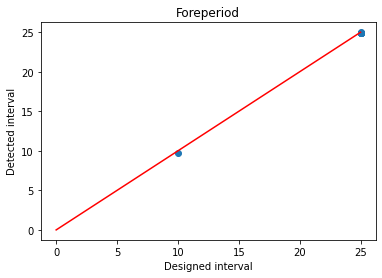

In [54]:
plt.close('all')
plt.figure(facecolor=(1, 1, 1))
designed_interval=np.append(spike_duration[3]/spike_counts[3],np.ones(9)*spike_duration[0]/spike_counts[0])
plt.scatter(designed_interval,fore_interval*1000)
plt.plot([0,25],[0,25],'r-')
plt.xlabel('Designed interval')
plt.ylabel('Detected interval')
plt.title('Foreperiod')
plt.savefig('Foreperiod spike interval')

In [33]:
## feedback period
fp = beh.FeedbackPeriod.to_numpy()/1000+34.176404
choice=beh.Choice.to_numpy()
spikes_sortedbystate=[[] for x in range(4)]

for trial in range(len(beh)-1): 
    
    ind = (Spikes_alinged>fp[trial]) & (Spikes_alinged<(fp[trial]+0.5))
    trial_spike=Spikes_alinged[ind]-fp[trial]
    
    if np.diff(beh.TrialNumInEpisode.values[trial:trial+2])<0:
        spikes_sortedbystate[3].append(trial_spike)
    else:
        spikes_sortedbystate[choice[trial]+1].append(trial_spike)

trial=len(beh)-1
ind = (Spikes_alinged>fp[trial]) & (Spikes_alinged<(fp[trial]+0.5))
trial_spike=Spikes_alinged[ind]-fp[trial]
spikes_sortedbystate[choice[len(beh)-1]+1].append(trial_spike)

In [47]:
fb_interval=np.zeros(4)
for ss in range(4):
    trial_interval=np.array([])
    for nn in range(len(spikes_sortedbystate[ss])):
        trial_interval=np.append(trial_interval,np.diff(spikes_sortedbystate[ss][nn]))
    fb_interval[ss]=np.mean(trial_interval)

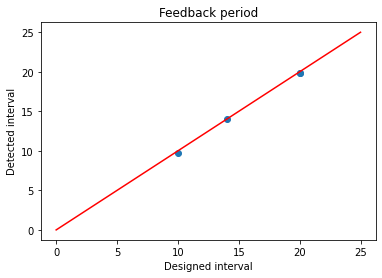

In [55]:
plt.close('all')
plt.figure(facecolor=(1, 1, 1))
designed_interval=np.array([spike_duration[2]/spike_counts[2],
                            spike_duration[1]/spike_counts[1],
                            spike_duration[2]/spike_counts[2],
                            spike_duration[3]/spike_counts[3]])
plt.scatter(designed_interval,fb_interval*1000)
plt.plot([0,25],[0,25],'r-')
plt.xlabel('Designed interval')
plt.ylabel('Detected interval')
plt.title('Feedback period')
plt.savefig('Feedback period spike interval')

C:\Users\liang\AppData\Local\Temp/ipykernel_14976/3930772675.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('Feedback Period')
C:\Users\liang\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


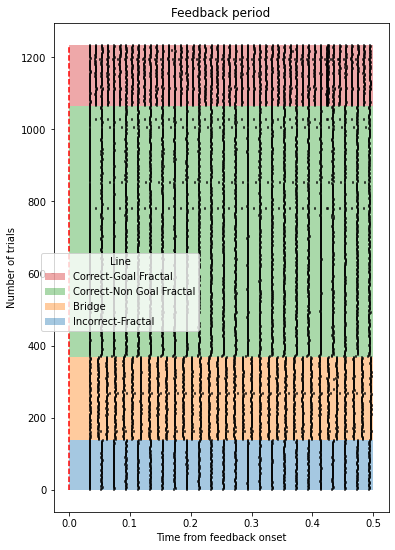

In [34]:
total_trial=0 
ChoiceNames=['Incorrect-Fractal','Bridge','Correct-Non Goal Fractal','Correct-Goal Fractal']
plt.close('all')
fig,ax=plt.subplots(figsize=(6,9))

for curr in range(4):
    
    curr_spikes = spikes_sortedbystate[curr]
    n_trial = len(curr_spikes)
    
    for tt in range(n_trial):
        plt.plot([curr_spikes[tt],curr_spikes[tt]],[tt+total_trial,tt+total_trial+1],'k-')
        
    plt.fill_between([0,0.5],[total_trial,total_trial],[total_trial+n_trial,total_trial+n_trial],alpha=0.4,label=ChoiceNames[curr])
    total_trial=total_trial+n_trial

plt.plot([0,0],[0,len(beh)],'r--')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Line', bbox_to_anchor=(0.45, 0.45))
plt.title('Feedback period')
plt.xlabel('Time from feedback onset')
plt.ylabel('Number of trials')
plt.savefig('Feedback Period')